In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import chirp, spectrogram
from scipy.io import wavfile
import sounddevice as sd

In [7]:
t = np.linspace(0,10,10000) #times to evaluate chirp
t1 = 10 #final time
f0 = 1 #start f
f1 = 10 #stop f
signal = chirp(t, f0, t1, f1, method = 'linear') 

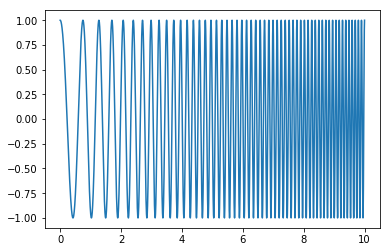

In [8]:
plt.plot(t, signal)
plt.show()

In [9]:
def plot_spectrogram(title, w, fs):
    ff, tt, Sxx = spectrogram(w, fs=fs, nperseg=256, nfft=576)
    plt.pcolormesh(tt, ff[:145], Sxx[:145], cmap='gray_r', shading='gouraud')
    plt.title(title)
    plt.xlabel('t (sec)')
    plt.ylabel('Frequency (Hz)')
    plt.grid()

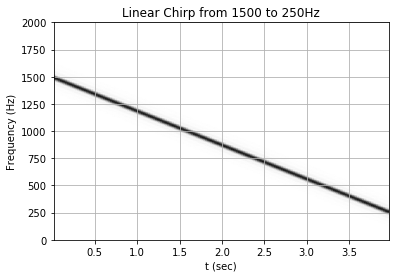

In [10]:
T = 4
fs = 8000
t = np.arange(0, int(T*fs)) / fs
w = chirp(t, f0=1500, f1=250, t1=T, method='linear')
plot_spectrogram('Linear Chirp from 1500 to 250Hz', w, fs)

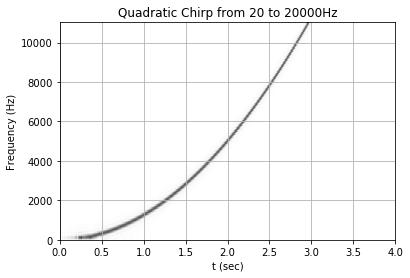

In [31]:
T = 4
fs = 44100
t = np.arange(0, int(T*fs)) / fs
w = chirp(t, f0=20, f1=20000, t1=T, method='quadratic')
plot_spectrogram('Quadratic Chirp from 20 to 20000Hz', w, fs)

In [12]:
from scipy.io.wavfile import write
write('quadratic_20_20k.wav', 44100, w)

In [13]:
w_inv = np.flip(w)

In [14]:
write('quadratic_20_20k_inv.wav', 44100, w_inv)

## Recordings

In [87]:
recordings = {}

In [88]:
recordings['piano_far'] = recording
recordings['piano_close'] = recording_close
recordings['bar_far'] = recording_bar
recordings['bar_close'] = recording_bar_close

In [108]:
samplerate = 44100
duration = 8

recording = sd.rec(
    duration * samplerate, samplerate=samplerate, channels=1, blocking=True
).flatten()

recordings['short_chirp_close'] = recording

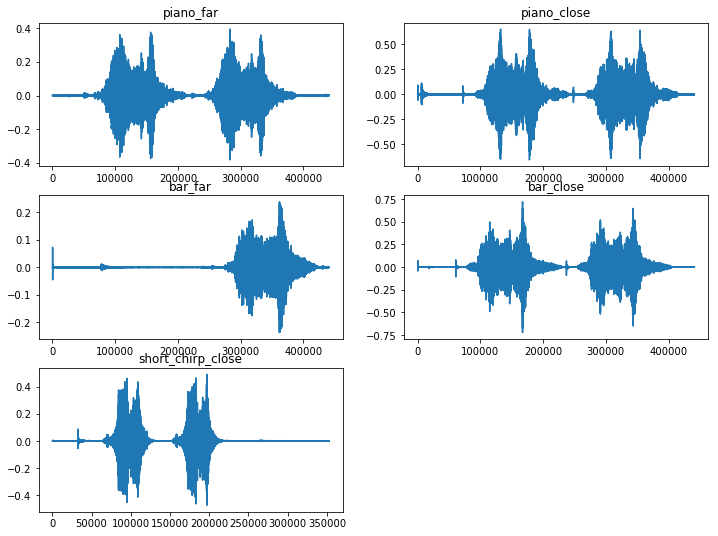

In [109]:
nrows = (len(recordings) + 1) // 2
ncols = 2

fig = plt.figure(figsize=(ncols*6,nrows*3))

for i, (key, val) in enumerate(recordings.items()):
    plt.subplot(nrows, ncols, i+1)
    plt.plot(val)
    plt.title(key)

In [26]:
sd.play(recording, samplerate=samplerate, blocking=True)

In [34]:
wavfile.write('received_chirp.wav', samplerate, recording)

In [121]:
# long chirp
# w = np.tile(chirp(t, f0=20, f1=20000, t1=T, method='quadratic'), 2)

# short chirp
short_chirp = np.tile(chirp(np.arange(0,int(2*samplerate))/samplerate, f0=20, f1=20000, t1=2, method='logarithmic'), 2)
#wavfile.write('sent_chirp.wav', samplerate, w)

In [122]:
conv = np.convolve(short_chirp[::-1], recordings['short_chirp_close'])

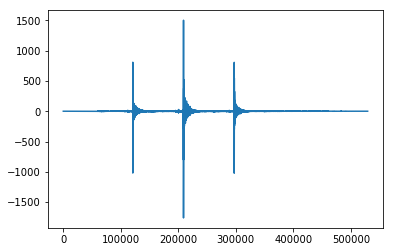

In [123]:
plt.plot(conv)

In [129]:
half_chirp = short_chirp[:len(short_chirp)//2]
chirp_conv = np.convolve(half_chirp[::-1], recordings['short_chirp_close'])

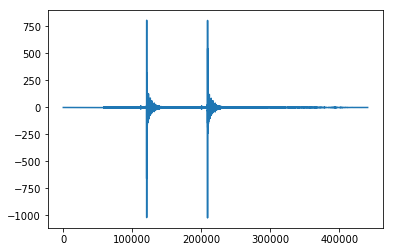

In [130]:
plt.plot(chirp_conv)

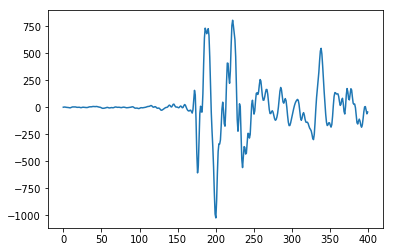

In [134]:
imax = np.argmax(abs(chirp_conv))
plt.plot(chirp_conv[imax-200:imax+200])

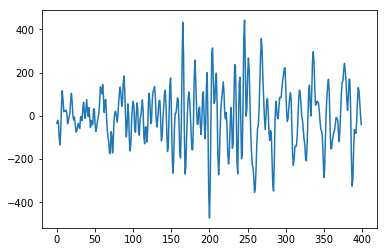

In [76]:
imax = np.argmax(abs(chirp_conv))
plt.plot(chirp_conv[imax-200:imax+200])

In [63]:
400/samplerate

0.009070294784580499

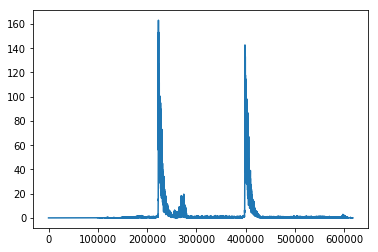

In [77]:
from scipy.signal import savgol_filter
smoothed = savgol_filter(abs(chirp_conv), 101, 3) 
plt.plot(smoothed)

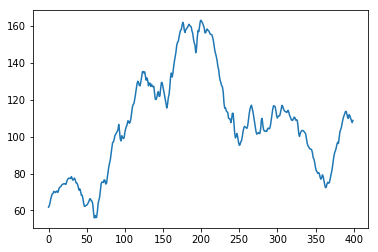

In [78]:
imax = np.argmax(abs(smoothed))
plt.plot(smoothed[imax-200:imax+200])

In [4]:
outside = wavfile.read('outside_take_2.wav')

In [5]:
inside = wavfile.read('inside_take_2.wav')

In [7]:
outside

(44100,
 array([ 0.0000000e+00,  0.0000000e+00, -3.0517578e-05, ...,
        -1.3732910e-03, -1.2512207e-03, -1.1901855e-03], dtype=float32))

## Chirp wav file analysis

In [12]:
from utilities import *

In [17]:
chirp = gen_chirp(5, save = False, play = False, form = 'quadratic', repititions = 1)

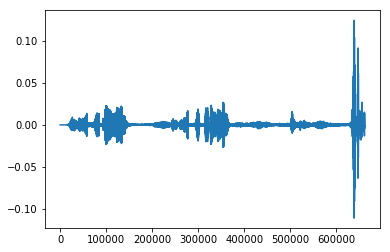

In [18]:
%matplotlib inline
plt.plot(outside[1])

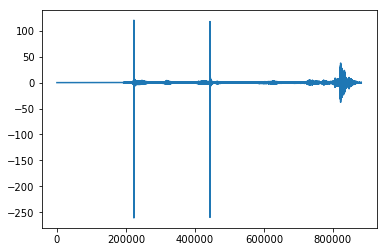

In [19]:
conv(outside[1], chirp)

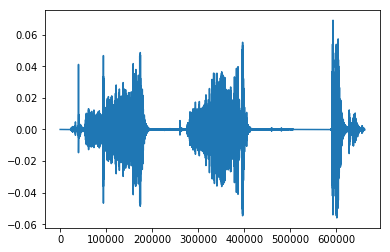

In [20]:
plt.plot(inside[1])

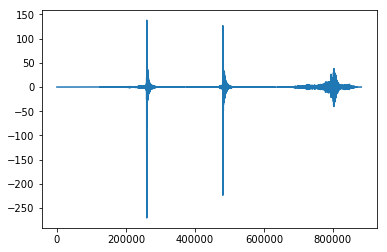

In [21]:
conv(inside[1], chirp)